<a href="https://colab.research.google.com/github/bharatkj22/Portfolio-Risk-Analysis/blob/main/Portfolio_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install required libraries
!pip install yfinance numpy pandas plotly

/tmp/ipython-input-50789763.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(assets, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  5 of 5 completed


{'Annualized Return': np.float64(0.1361602043566718),
 'Annualized Volatility': np.float64(0.12485137287368409),
 'CVaR (95%) Historical': np.float64(-0.017562606495233002),
 'CVaR (95%) Monte Carlo': np.float64(-0.01565184956729739),
 'VaR (95%) Historical': np.float64(-0.012460254558890204),
 'VaR (95%) Monte Carlo': np.float64(-0.012390229084423977)}


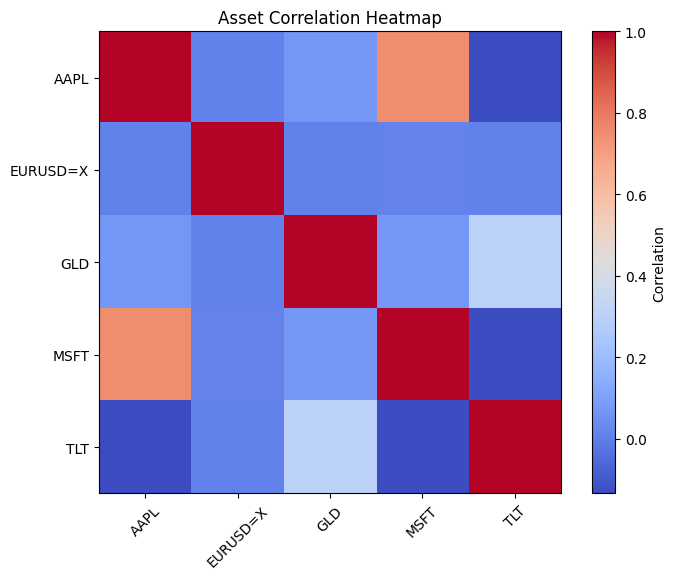

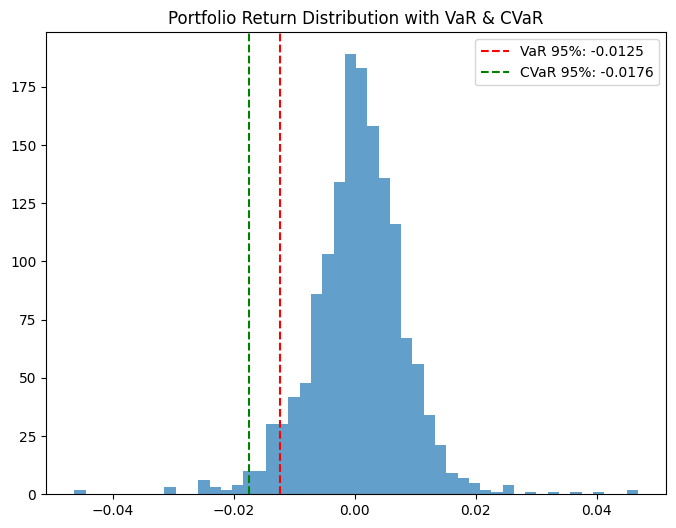

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define assets and download historical price data
assets = ["AAPL", "MSFT", "GLD", "TLT", "EURUSD=X"]  # equities, gold, bonds, FX
start_date = "2018-01-01"
end_date = "2023-12-31"

data = yf.download(assets, start=start_date, end=end_date)["Close"]

# Step 2: Clean & prepare data
data = data.dropna()

# Step 3: Compute daily returns
returns = data.pct_change().dropna()

# Step 4: Portfolio setup - equal weights
weights = np.array([1/len(assets)] * len(assets))

# Portfolio return and volatility
portfolio_return = np.dot(weights, returns.mean()) * 252
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))

# Step 5: Value at Risk (VaR) - 95% confidence
confidence_level = 0.05
portfolio_returns = returns.dot(weights)
VaR_95 = np.percentile(portfolio_returns, 100*confidence_level)

# Step 6: Conditional VaR (CVaR)
CVaR_95 = portfolio_returns[portfolio_returns <= VaR_95].mean()

# Step 7: Monte Carlo Simulation
simulations = 10000
simulated_returns = np.random.normal(portfolio_returns.mean(), portfolio_returns.std(), simulations)
VaR_MC = np.percentile(simulated_returns, 100*confidence_level)
CVaR_MC = simulated_returns[simulated_returns <= VaR_MC].mean()

# Step 8: Output key metrics
metrics = {
    "Annualized Return": portfolio_return,
    "Annualized Volatility": portfolio_volatility,
    "VaR (95%) Historical": VaR_95,
    "CVaR (95%) Historical": CVaR_95,
    "VaR (95%) Monte Carlo": VaR_MC,
    "CVaR (95%) Monte Carlo": CVaR_MC
}

import pprint
pprint.pprint(metrics)

# Step 9: Visualization - Correlation Heatmap
corr = returns.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Asset Correlation Heatmap")
plt.show()

# Step 10: Visualization - Portfolio Return Distribution
plt.figure(figsize=(8,6))
plt.hist(portfolio_returns, bins=50, alpha=0.7)
plt.axvline(VaR_95, color='r', linestyle='--', label=f'VaR 95%: {VaR_95:.4f}')
plt.axvline(CVaR_95, color='g', linestyle='--', label=f'CVaR 95%: {CVaR_95:.4f}')
plt.legend()
plt.title("Portfolio Return Distribution with VaR & CVaR")
plt.show()


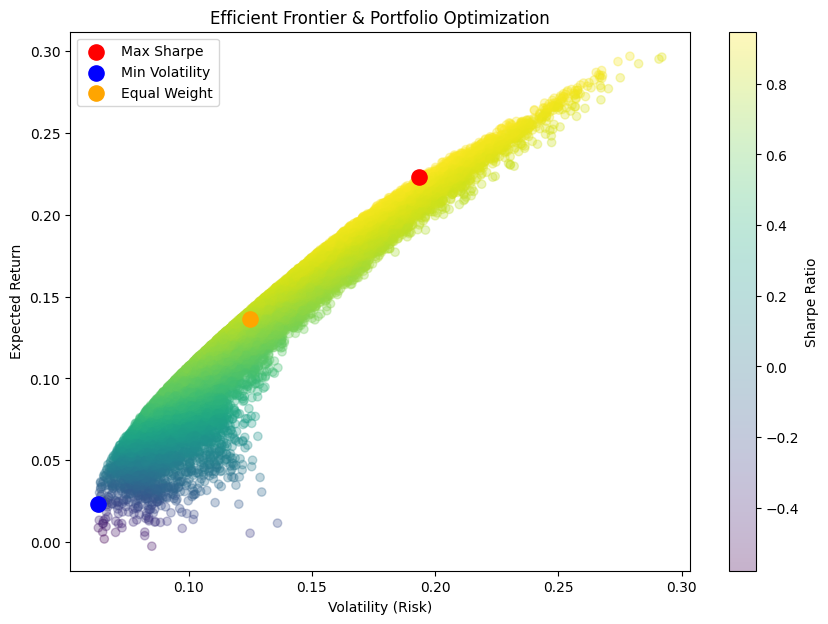

📊 Portfolio Comparison:

Equal-Weight Portfolio: Return=13.62%, Volatility=12.49%, Sharpe=0.77
Max Sharpe Portfolio:   Return=22.30%, Volatility=19.32%, Sharpe=0.95
Min Volatility Portf.:  Return=2.32%, Volatility=6.33%

⚡ Sharpe Ratio Improvement vs Equal-Weight: 23.0%

🔎 Max Sharpe Portfolio Allocation:
  AAPL: 26.24%
  MSFT: 0.28%
  GLD: 36.46%
  TLT: 36.92%
  EURUSD=X: 0.11%

🔎 Min Volatility Portfolio Allocation:
  AAPL: 0.61%
  MSFT: 72.35%
  GLD: 9.77%
  TLT: 7.14%
  EURUSD=X: 10.13%


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Setup
np.random.seed(42)
num_portfolios = 50000
risk_free_rate = 0.04  # 4% annual risk-free rate

returns_mean = returns.mean() * 252
cov_matrix = returns.cov() * 252
n_assets = len(assets)

# Step 2: Simulate random portfolios
portfolio_returns = []
portfolio_volatility = []
sharpe_ratios = []
portfolio_weights = []

for _ in range(num_portfolios):
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)

    ret = np.dot(weights, returns_mean)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (ret - risk_free_rate) / vol

    portfolio_returns.append(ret)
    portfolio_volatility.append(vol)
    sharpe_ratios.append(sharpe)
    portfolio_weights.append(weights)

# Convert to arrays
portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)
sharpe_ratios = np.array(sharpe_ratios)

# Step 3: Locate max Sharpe & min volatility portfolios
max_sharpe_idx = sharpe_ratios.argmax()
min_vol_idx = portfolio_volatility.argmin()

max_sharpe_ret = portfolio_returns[max_sharpe_idx]
max_sharpe_vol = portfolio_volatility[max_sharpe_idx]
max_sharpe_wts = portfolio_weights[max_sharpe_idx]
max_sharpe_ratio = sharpe_ratios[max_sharpe_idx]

min_vol_ret = portfolio_returns[min_vol_idx]
min_vol_vol = portfolio_volatility[min_vol_idx]
min_vol_wts = portfolio_weights[min_vol_idx]

# Step 4: Equal-weight portfolio (baseline)
equal_weights = np.array([1/n_assets]*n_assets)
equal_ret = np.dot(equal_weights, returns_mean)
equal_vol = np.sqrt(np.dot(equal_weights.T, np.dot(cov_matrix, equal_weights)))
equal_sharpe = (equal_ret - risk_free_rate) / equal_vol

# Step 5: Plot Efficient Frontier
plt.figure(figsize=(10,7))
plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratios, cmap='viridis', alpha=0.3)
plt.colorbar(label="Sharpe Ratio")

# Highlight portfolios
plt.scatter(max_sharpe_vol, max_sharpe_ret, c='red', s=120, label='Max Sharpe')
plt.scatter(min_vol_vol, min_vol_ret, c='blue', s=120, label='Min Volatility')
plt.scatter(equal_vol, equal_ret, c='orange', s=120, label='Equal Weight')

plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier & Portfolio Optimization")
plt.legend()
plt.show()

# Step 6: Print results
print("📊 Portfolio Comparison:\n")
print(f"Equal-Weight Portfolio: Return={equal_ret:.2%}, Volatility={equal_vol:.2%}, Sharpe={equal_sharpe:.2f}")
print(f"Max Sharpe Portfolio:   Return={max_sharpe_ret:.2%}, Volatility={max_sharpe_vol:.2%}, Sharpe={max_sharpe_ratio:.2f}")
print(f"Min Volatility Portf.:  Return={min_vol_ret:.2%}, Volatility={min_vol_vol:.2%}")

# Sharpe improvement
improvement = (max_sharpe_ratio - equal_sharpe) / abs(equal_sharpe) * 100
print(f"\n⚡ Sharpe Ratio Improvement vs Equal-Weight: {improvement:.1f}%")

# Step 7: Print optimal weights
print("\n🔎 Max Sharpe Portfolio Allocation:")
for asset, weight in zip(assets, max_sharpe_wts):
    print(f"  {asset}: {weight:.2%}")

print("\n🔎 Min Volatility Portfolio Allocation:")
for asset, weight in zip(assets, min_vol_wts):
    print(f"  {asset}: {weight:.2%}")


In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from PIL import Image

plt.rcParams["figure.dpi"] = 140

# Assets and horizon
assets = ["AAPL", "MSFT", "GLD", "TLT", "EURUSD=X"]   # equity, gold, bonds, FX
start_date = "2018-01-01"
end_date   = "2023-12-31"

In [24]:
# Download (yfinance changed default to auto_adjust=True -> use "Close")
prices = yf.download(assets, start=start_date, end=end_date)["Close"].dropna()
returns = prices.pct_change().dropna()


/tmp/ipython-input-3201256870.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(assets, start=start_date, end=end_date)["Close"].dropna()
[*********************100%***********************]  5 of 5 completed


In [25]:
# Equal-weight baseline
n = len(assets)
w_eq = np.ones(n)/n
mu_ann = returns.mean() * 252
cov_ann = returns.cov() * 252

In [26]:
# --- RISK METRICS -----------------------------------------------------------
# Annualized stats
ret_eq  = float(np.dot(w_eq, mu_ann))
vol_eq  = float(np.sqrt(w_eq @ cov_ann @ w_eq))
sharpe_rf = 0.04
sr_eq = (ret_eq - sharpe_rf)/vol_eq

In [27]:
# Historical VaR/CVaR (daily)
p_ret_daily = returns.dot(w_eq)
alpha = 0.95
var_hist = np.percentile(p_ret_daily, (1-alpha)*100)           # negative number
cvar_hist = p_ret_daily[p_ret_daily <= var_hist].mean()


In [28]:
# Monte Carlo on daily returns
Nsim = 10000
sim = np.random.normal(p_ret_daily.mean(), p_ret_daily.std(), Nsim)
var_mc = np.percentile(sim, (1-alpha)*100)
cvar_mc = sim[sim <= var_mc].mean()

In [29]:
# --- ESG INPUTS -------------------------------------------------------------
# Replace with real vendor scores if you have them (scale 0–100).
# If an asset is an index/fund, you can use the fund’s ESG score or your own mapping.
esg_scores = {
    "AAPL": 72,
    "MSFT": 78,
    "GLD":  55,   # gold proxy ETF — set a neutral score or from vendor
    "TLT":  65,   # US Treasury ETF — governance = high, env/social = neutral
    "EURUSD=X": 60  # FX proxy — treat as neutral or based on macro ESG view
}
# Build aligned ESG vector (0..100), and a 0..1 normalized version
esg_vec = np.array([esg_scores[a] for a in assets], dtype=float)
esg_norm = (esg_vec - 0.0) / 100.0

In [30]:
# --- ESG-AWARE OPTIMIZATION (random search) --------------------------------
# Objective: Maximize   Sharpe + λ * ESG_score
# with an optional ESG screen: portfolio_ESG >= min_portfolio_esg
np.random.seed(42)
Npf = 60000
lambda_esg = 0.50      # tilt toward ESG (0 = ignore ESG, 0.5 = moderate tilt)
min_portfolio_esg = 0.60  # screen on weighted ESG (0..1). Set to None to disable.

rets, vols, sharpe, esg_w, wts = [], [], [], [], []

for _ in range(Npf):
    w = np.random.random(n)
    w = w / w.sum()
    r = float(w @ mu_ann)
    v = float(np.sqrt(w @ cov_ann @ w))
    if v == 0:
        continue
    sr = (r - sharpe_rf)/v
    e  = float(w @ esg_norm)        # 0..1

    # ESG screen
    if (min_portfolio_esg is not None) and (e < min_portfolio_esg):
        continue

    rets.append(r); vols.append(v); sharpe.append(sr); esg_w.append(e); wts.append(w)

rets = np.array(rets); vols = np.array(vols); sharpe = np.array(sharpe); esg_w = np.array(esg_w)
# ESG-tilted score
score = sharpe + lambda_esg * esg_w

# Locate optimal portfolios
idx_max_score = np.argmax(score)
idx_min_vol   = np.argmin(vols)
w_max = wts[idx_max_score]; w_min = wts[idx_min_vol]

ret_max, vol_max, sr_max, esg_max = rets[idx_max_score], vols[idx_max_score], sharpe[idx_max_score], esg_w[idx_max_score]
ret_min, vol_min, sr_min, esg_min = rets[idx_min_vol],  vols[idx_min_vol],  sharpe[idx_min_vol],  esg_w[idx_min_vol]


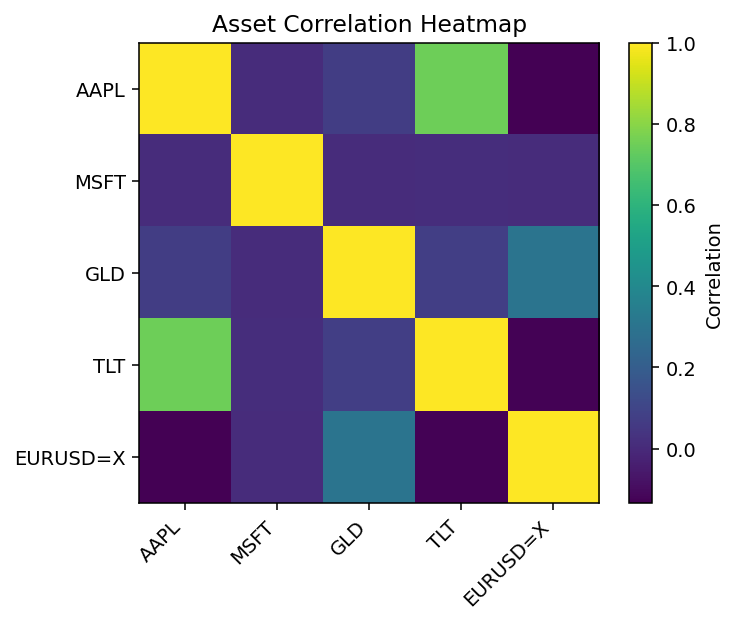

In [33]:
# Improvement vs equal-weight (risk-adjusted and ESG)
sr_improve_pct  = (sr_max - sr_eq)/abs(sr_eq)*100.0
esg_improve_pct = (esg_max - float(w_eq @ esg_norm)) / max(1e-9, float(w_eq @ esg_norm)) * 100.0

# --- PLOTS (each chart = its own figure) -----------------------------------
# 1) Correlation heat map
corr = returns.corr()
plt.figure(figsize=(5.5,4.5))
plt.imshow(corr, interpolation="none")
plt.xticks(range(n), assets, rotation=45, ha="right")
plt.yticks(range(n), assets)
plt.title("Asset Correlation Heatmap")
plt.colorbar(label="Correlation")
plt.tight_layout()
plt.savefig("corr.png")


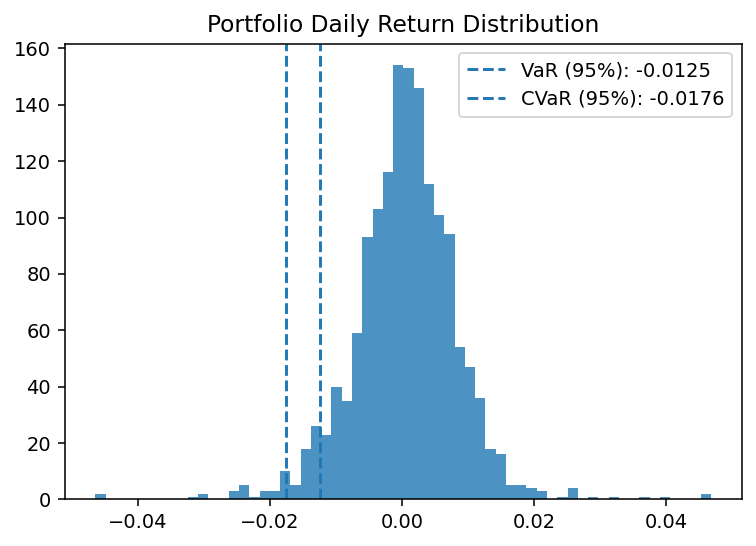

In [34]:
# 2) VaR/CVaR histogram (daily)
plt.figure(figsize=(5.5,4.0))
plt.hist(p_ret_daily, bins=60, alpha=0.8)
plt.axvline(var_hist, linestyle="--", linewidth=1.5, label=f"VaR (95%): {var_hist:.4f}")
plt.axvline(cvar_hist, linestyle="--", linewidth=1.5, label=f"CVaR (95%): {cvar_hist:.4f}")
plt.title("Portfolio Daily Return Distribution")
plt.legend()
plt.tight_layout()
plt.savefig("var_hist.png")

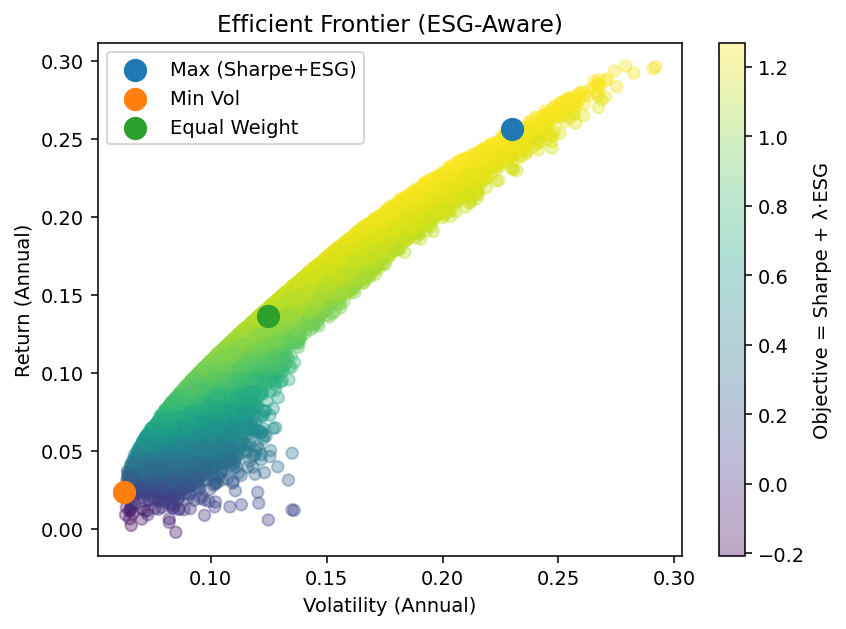

In [36]:
# 3) Efficient frontier cloud (ESG-tilted score by brightness)
plt.figure(figsize=(6.2,4.6))
sc = plt.scatter(vols, rets, c=score, alpha=0.35)
plt.scatter(vol_max, ret_max, s=120, label="Max (Sharpe+ESG)")
plt.scatter(vol_min, ret_min, s=120, label="Min Vol")
plt.scatter(vol_eq, ret_eq,   s=120, label="Equal Weight")
plt.xlabel("Volatility (Annual)")
plt.ylabel("Return (Annual)")
plt.title("Efficient Frontier (ESG-Aware)")
plt.legend()
cb = plt.colorbar(sc)
cb.set_label("Objective = Sharpe + λ·ESG")
plt.tight_layout()
plt.savefig("frontier.png")

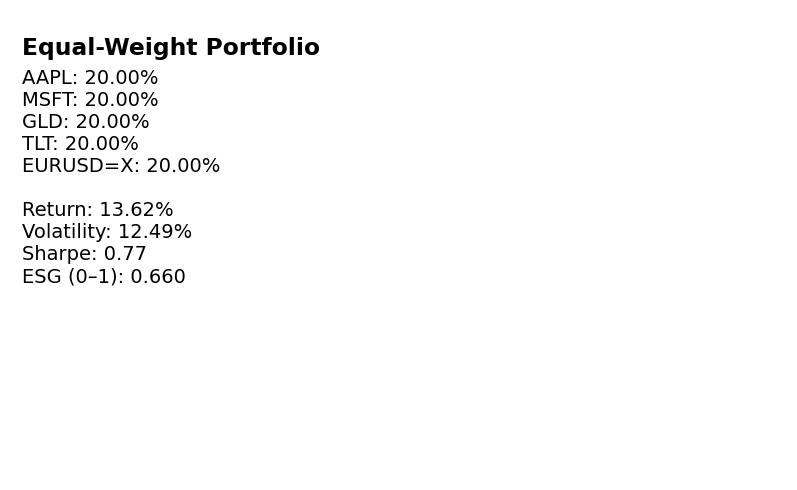

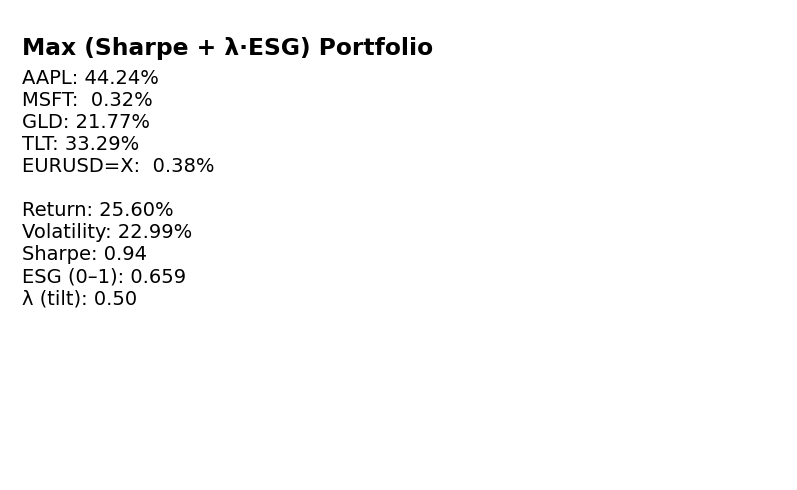

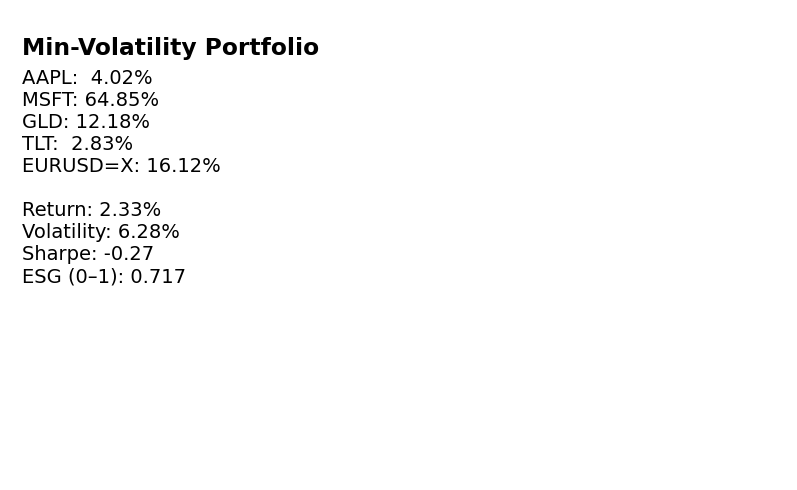

In [40]:
# 4) Weights tables as images (text figure)
def save_weights_table(filename, title, assets, weights, extra_lines=None):
    fig = plt.figure(figsize=(5.8, 3.6))
    fig.patch.set_alpha(0.0)
    plt.axis("off")
    lines = [f"{a}: {w*100:5.2f}%" for a, w in zip(assets, weights)]
    if extra_lines:
        lines += [""] + extra_lines
    txt = "\n".join(lines)
    plt.text(0.01, 0.95, title, fontsize=12, va="top", fontweight="bold")
    plt.text(0.01, 0.88, txt, fontsize=10, va="top")
    plt.tight_layout()
    plt.savefig(filename, bbox_inches="tight", transparent=True)
save_weights_table(
    "w_eq.png", "Equal-Weight Portfolio",
    assets, w_eq,
    [
        f"Return: {ret_eq:.2%}",
        f"Volatility: {vol_eq:.2%}",
        f"Sharpe: {sr_eq:.2f}",
        f"ESG (0–1): {(w_eq @ esg_norm):.3f}"
    ]
)

save_weights_table(
    "w_max.png", "Max (Sharpe + λ·ESG) Portfolio",
    assets, w_max,
    [
        f"Return: {ret_max:.2%}",
        f"Volatility: {vol_max:.2%}",
        f"Sharpe: {sr_max:.2f}",
        f"ESG (0–1): {esg_max:.3f}",
        f"λ (tilt): {lambda_esg:.2f}"
    ]
)

save_weights_table(
    "w_min.png", "Min-Volatility Portfolio",
    assets, w_min,
    [
        f"Return: {ret_min:.2%}",
        f"Volatility: {vol_min:.2%}",
        f"Sharpe: {sr_min:.2f}",
        f"ESG (0–1): {esg_min:.3f}"
    ]
)


In [45]:
# --- STITCH “ONE-FRAME” DASHBOARD ------------------------------------------
# Read images and tile them into a single canvas
def load(img):
    return Image.open(img).convert("RGBA")

A = load("corr.png")
B = load("var_hist.png")
C = load("frontier.png")
D = load("w_eq.png")
E = load("w_max.png")
F = load("w_min.png")

# Normalize widths
W = max(A.width, B.width, C.width)
def pad(im, W):
    if im.width == W: return im
    canvas = Image.new("RGBA", (W, im.height), (255,255,255,0))
    canvas.paste(im, ( (W - im.width)//2, 0 ))
    return canvas

A,B,C,D,E,F = map(lambda im: pad(im, W), [A,B,C,D,E,F])

# Compose: two columns
col1 = Image.new("RGBA", (W, A.height + C.height + D.height), (255,255,255,0))
y=0
for im in [A, C, D]:
    col1.paste(im, (0,y)); y+=im.height

col2 = Image.new("RGBA", (W, B.height + E.height + F.height), (255,255,255,0))
y=0
for im in [B, E, F]:
    col2.paste(im, (0,y)); y+=im.height

dash = Image.new("RGBA", (W*2, max(col1.height, col2.height)), (255,255,255,255))
dash.paste(col1, (0,0)); dash.paste(col2, (W,0))

# Title banner
title_bar = Image.new("RGBA", (dash.width, 60), (255,255,255,255))
fig = plt.figure(figsize=(dash.width/140, 0.7))
plt.axis("off")
plt.text(0.01, 0.5, "Multi-Asset Portfolio: Risk • VaR/CVaR • ESG-Aware Optimization", va="center", fontsize=16)
plt.tight_layout()
plt.savefig("title.png", bbox_inches="tight", transparent=True); plt.close()
title = load("title.png").resize((dash.width, 60))
final = Image.new("RGBA", (dash.width, 60 + dash.height), (255,255,255,255))
final.paste(title, (0,0)); final.paste(dash, (0,60))

final.convert("RGB").save("dashboard.png", quality=95)



In [43]:
# --- SUMMARY TABLE (for report / export) -----------------------------------
summary = pd.DataFrame(
    {
        "Portfolio": ["Equal Weight", "Max (Sharpe+ESG)", "Min Volatility"],
        "Return (ann.)": [ret_eq, ret_max, ret_min],
        "Vol (ann.)":    [vol_eq, vol_max, vol_min],
        "Sharpe":        [sr_eq, sr_max, sr_min],
        "ESG (0–1)":     [float(w_eq @ esg_norm), esg_max, esg_min],
    }
)
summary.to_csv("portfolio_summary.csv", index=False)

print("=== Key Results ===")
print(summary.to_string(index=False))
print(f"\nΔ Sharpe vs Equal (Max objective): {sr_improve_pct:.1f}%")
print(f"Δ ESG vs Equal (Max objective):    {esg_improve_pct:.1f}%")
print(f"VaR(95%): {var_hist:.4f} | CVaR(95%): {cvar_hist:.4f}  (daily, hist)")
print("\nFiles saved:")
print(" - dashboard.png")
print(" - corr.png, var_hist.png, frontier.png, w_eq.png, w_max.png, w_min.png")
print(" - portfolio_summary.csv")

=== Key Results ===
       Portfolio  Return (ann.)  Vol (ann.)    Sharpe  ESG (0–1)
    Equal Weight       0.136160    0.124851  0.770197   0.660000
Max (Sharpe+ESG)       0.255958    0.229934  0.939219   0.659429
  Min Volatility       0.023302    0.062811 -0.265847   0.716878

Δ Sharpe vs Equal (Max objective): 21.9%
Δ ESG vs Equal (Max objective):    -0.1%
VaR(95%): -0.0125 | CVaR(95%): -0.0176  (daily, hist)

Files saved:
 - dashboard.png
 - corr.png, var_hist.png, frontier.png, w_eq.png, w_max.png, w_min.png
 - portfolio_summary.csv


In [46]:
# --- SETUP & DATA -----------------------------------------------------------
!pip -q install yfinance

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from PIL import Image

plt.rcParams["figure.dpi"] = 140

# Assets and horizon
assets = ["AAPL", "MSFT", "GLD", "TLT", "EURUSD=X"]   # equity, gold, bonds, FX
start_date = "2018-01-01"
end_date   = "2023-12-31"

# Download (yfinance changed default to auto_adjust=True -> use "Close")
prices = yf.download(assets, start=start_date, end=end_date)["Close"].dropna()
returns = prices.pct_change().dropna()

# Equal-weight baseline
n = len(assets)
w_eq = np.ones(n)/n
mu_ann = returns.mean() * 252
cov_ann = returns.cov() * 252

# --- RISK METRICS -----------------------------------------------------------
# Annualized stats
ret_eq  = float(np.dot(w_eq, mu_ann))
vol_eq  = float(np.sqrt(w_eq @ cov_ann @ w_eq))
sharpe_rf = 0.04
sr_eq = (ret_eq - sharpe_rf)/vol_eq

# Historical VaR/CVaR (daily)
p_ret_daily = returns.dot(w_eq)
alpha = 0.95
var_hist = np.percentile(p_ret_daily, (1-alpha)*100)           # negative number
cvar_hist = p_ret_daily[p_ret_daily <= var_hist].mean()

# Monte Carlo on daily returns
Nsim = 10000
sim = np.random.normal(p_ret_daily.mean(), p_ret_daily.std(), Nsim)
var_mc = np.percentile(sim, (1-alpha)*100)
cvar_mc = sim[sim <= var_mc].mean()

# --- ESG INPUTS -------------------------------------------------------------
# Replace with real vendor scores if you have them (scale 0–100).
# If an asset is an index/fund, you can use the fund’s ESG score or your own mapping.
esg_scores = {
    "AAPL": 72,
    "MSFT": 78,
    "GLD":  55,   # gold proxy ETF — set a neutral score or from vendor
    "TLT":  65,   # US Treasury ETF — governance = high, env/social = neutral
    "EURUSD=X": 60  # FX proxy — treat as neutral or based on macro ESG view
}
# Build aligned ESG vector (0..100), and a 0..1 normalized version
esg_vec = np.array([esg_scores[a] for a in assets], dtype=float)
esg_norm = (esg_vec - 0.0) / 100.0

# --- ESG-AWARE OPTIMIZATION (random search) --------------------------------
# Objective: Maximize   Sharpe + λ * ESG_score
# with an optional ESG screen: portfolio_ESG >= min_portfolio_esg
np.random.seed(42)
Npf = 60000
lambda_esg = 0.50      # tilt toward ESG (0 = ignore ESG, 0.5 = moderate tilt)
min_portfolio_esg = 0.60  # screen on weighted ESG (0..1). Set to None to disable.

rets, vols, sharpe, esg_w, wts = [], [], [], [], []

for _ in range(Npf):
    w = np.random.random(n)
    w = w / w.sum()
    r = float(w @ mu_ann)
    v = float(np.sqrt(w @ cov_ann @ w))
    if v == 0:
        continue
    sr = (r - sharpe_rf)/v
    e  = float(w @ esg_norm)        # 0..1

    # ESG screen
    if (min_portfolio_esg is not None) and (e < min_portfolio_esg):
        continue

    rets.append(r); vols.append(v); sharpe.append(sr); esg_w.append(e); wts.append(w)

rets = np.array(rets); vols = np.array(vols); sharpe = np.array(sharpe); esg_w = np.array(esg_w)
# ESG-tilted score
score = sharpe + lambda_esg * esg_w

# Locate optimal portfolios
idx_max_score = np.argmax(score)
idx_min_vol   = np.argmin(vols)
w_max = wts[idx_max_score]; w_min = wts[idx_min_vol]

ret_max, vol_max, sr_max, esg_max = rets[idx_max_score], vols[idx_max_score], sharpe[idx_max_score], esg_w[idx_max_score]
ret_min, vol_min, sr_min, esg_min = rets[idx_min_vol],  vols[idx_min_vol],  sharpe[idx_min_vol],  esg_w[idx_min_vol]

# Improvement vs equal-weight (risk-adjusted and ESG)
sr_improve_pct  = (sr_max - sr_eq)/abs(sr_eq)*100.0
esg_improve_pct = (esg_max - float(w_eq @ esg_norm)) / max(1e-9, float(w_eq @ esg_norm)) * 100.0

# --- PLOTS (each chart = its own figure) -----------------------------------
# 1) Correlation heat map
corr = returns.corr()
plt.figure(figsize=(5.5,4.5))
plt.imshow(corr, interpolation="none")
plt.xticks(range(n), assets, rotation=45, ha="right")
plt.yticks(range(n), assets)
plt.title("Asset Correlation Heatmap")
plt.colorbar(label="Correlation")
plt.tight_layout()
plt.savefig("corr.png"); plt.close()

# 2) VaR/CVaR histogram (daily)
plt.figure(figsize=(5.5,4.0))
plt.hist(p_ret_daily, bins=60, alpha=0.8)
plt.axvline(var_hist, linestyle="--", linewidth=1.5, label=f"VaR (95%): {var_hist:.4f}")
plt.axvline(cvar_hist, linestyle="--", linewidth=1.5, label=f"CVaR (95%): {cvar_hist:.4f}")
plt.title("Portfolio Daily Return Distribution")
plt.legend()
plt.tight_layout()
plt.savefig("var_hist.png"); plt.close()

# 3) Efficient frontier cloud (ESG-tilted score by brightness)
plt.figure(figsize=(6.2,4.6))
sc = plt.scatter(vols, rets, c=score, alpha=0.35)
plt.scatter(vol_max, ret_max, s=120, label="Max (Sharpe+ESG)")
plt.scatter(vol_min, ret_min, s=120, label="Min Vol")
plt.scatter(vol_eq, ret_eq,   s=120, label="Equal Weight")
plt.xlabel("Volatility (Annual)")
plt.ylabel("Return (Annual)")
plt.title("Efficient Frontier (ESG-Aware)")
plt.legend()
cb = plt.colorbar(sc)
cb.set_label("Objective = Sharpe + λ·ESG")
plt.tight_layout()
plt.savefig("frontier.png"); plt.close()

# 4) Weights tables as images (text figure)
def save_weights_table(filename, title, assets, weights, extra_lines=None):
    fig = plt.figure(figsize=(5.8, 3.6))
    fig.patch.set_alpha(0.0)
    plt.axis("off")
    lines = [f"{a}: {w*100:5.2f}%" for a, w in zip(assets, weights)]
    if extra_lines:
        lines += [""] + extra_lines
    txt = "\n".join(lines)
    plt.text(0.01, 0.95, title, fontsize=12, va="top", fontweight="bold")
    plt.text(0.01, 0.88, txt, fontsize=10, va="top")
    plt.tight_layout()
    plt.savefig(filename, bbox_inches="tight", transparent=True)
    plt.close()

save_weights_table(
    "w_eq.png", "Equal-Weight Portfolio",
    assets, w_eq,
    [
        f"Return: {ret_eq:.2%}",
        f"Volatility: {vol_eq:.2%}",
        f"Sharpe: {sr_eq:.2f}",
        f"ESG (0–1): {(w_eq @ esg_norm):.3f}"
    ]
)

save_weights_table(
    "w_max.png", "Max (Sharpe + λ·ESG) Portfolio",
    assets, w_max,
    [
        f"Return: {ret_max:.2%}",
        f"Volatility: {vol_max:.2%}",
        f"Sharpe: {sr_max:.2f}",
        f"ESG (0–1): {esg_max:.3f}",
        f"λ (tilt): {lambda_esg:.2f}"
    ]
)

save_weights_table(
    "w_min.png", "Min-Volatility Portfolio",
    assets, w_min,
    [
        f"Return: {ret_min:.2%}",
        f"Volatility: {vol_min:.2%}",
        f"Sharpe: {sr_min:.2f}",
        f"ESG (0–1): {esg_min:.3f}"
    ]
)

# --- STITCH “ONE-FRAME” DASHBOARD ------------------------------------------
# Read images and tile them into a single canvas
def load(img):
    return Image.open(img).convert("RGBA")

A = load("corr.png")
B = load("var_hist.png")
C = load("frontier.png")
D = load("w_eq.png")
E = load("w_max.png")
F = load("w_min.png")

# Normalize widths
W = max(A.width, B.width, C.width)
def pad(im, W):
    if im.width == W: return im
    canvas = Image.new("RGBA", (W, im.height), (255,255,255,0))
    canvas.paste(im, ( (W - im.width)//2, 0 ))
    return canvas

A,B,C,D,E,F = map(lambda im: pad(im, W), [A,B,C,D,E,F])

# Compose: two columns
col1 = Image.new("RGBA", (W, A.height + C.height + D.height), (255,255,255,0))
y=0
for im in [A, C, D]:
    col1.paste(im, (0,y)); y+=im.height

col2 = Image.new("RGBA", (W, B.height + E.height + F.height), (255,255,255,0))
y=0
for im in [B, E, F]:
    col2.paste(im, (0,y)); y+=im.height

dash = Image.new("RGBA", (W*2, max(col1.height, col2.height)), (255,255,255,255))
dash.paste(col1, (0,0)); dash.paste(col2, (W,0))

# Title banner
title_bar = Image.new("RGBA", (dash.width, 60), (255,255,255,255))
fig = plt.figure(figsize=(dash.width/140, 0.7))
plt.axis("off")
plt.text(0.01, 0.5, "Multi-Asset Portfolio: Risk • VaR/CVaR • ESG-Aware Optimization", va="center", fontsize=16)
plt.tight_layout()
plt.savefig("title.png", bbox_inches="tight", transparent=True); plt.close()
title = load("title.png").resize((dash.width, 60))
final = Image.new("RGBA", (dash.width, 60 + dash.height), (255,255,255,255))
final.paste(title, (0,0)); final.paste(dash, (0,60))

final.convert("RGB").save("dashboard.png", quality=95)

# --- SUMMARY TABLE (for report / export) -----------------------------------
summary = pd.DataFrame(
    {
        "Portfolio": ["Equal Weight", "Max (Sharpe+ESG)", "Min Volatility"],
        "Return (ann.)": [ret_eq, ret_max, ret_min],
        "Vol (ann.)":    [vol_eq, vol_max, vol_min],
        "Sharpe":        [sr_eq, sr_max, sr_min],
        "ESG (0–1)":     [float(w_eq @ esg_norm), esg_max, esg_min],
    }
)
summary.to_csv("portfolio_summary.csv", index=False)

print("=== Key Results ===")
print(summary.to_string(index=False))
print(f"\nΔ Sharpe vs Equal (Max objective): {sr_improve_pct:.1f}%")
print(f"Δ ESG vs Equal (Max objective):    {esg_improve_pct:.1f}%")
print(f"VaR(95%): {var_hist:.4f} | CVaR(95%): {cvar_hist:.4f}  (daily, hist)")
print("\nFiles saved:")
print(" - dashboard.png")
print(" - corr.png, var_hist.png, frontier.png, w_eq.png, w_max.png, w_min.png")
print(" - portfolio_summary.csv")


/tmp/ipython-input-1785642175.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(assets, start=start_date, end=end_date)["Close"].dropna()
[*********************100%***********************]  5 of 5 completed


=== Key Results ===
       Portfolio  Return (ann.)  Vol (ann.)    Sharpe  ESG (0–1)
    Equal Weight       0.136160    0.124851  0.770197   0.660000
Max (Sharpe+ESG)       0.255958    0.229934  0.939219   0.659429
  Min Volatility       0.023302    0.062811 -0.265847   0.716878

Δ Sharpe vs Equal (Max objective): 21.9%
Δ ESG vs Equal (Max objective):    -0.1%
VaR(95%): -0.0125 | CVaR(95%): -0.0176  (daily, hist)

Files saved:
 - dashboard.png
 - corr.png, var_hist.png, frontier.png, w_eq.png, w_max.png, w_min.png
 - portfolio_summary.csv
